In [0]:
import _pickle as cPickle
import numpy as np

In [0]:
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar jxf RML2016.10b.tar.bz2

--2019-05-08 00:33:03--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  9.61MB/s    in 2m 30s  

2019-05-08 00:35:38 (7.94 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]



In [0]:
Xd = cPickle.load(open("RML2016.10b.dat",'rb'), encoding='bytes')
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
print(Xd.keys())

dict_keys([(b'QPSK', 2), (b'PAM4', 8), (b'AM-DSB', -4), (b'GFSK', 6), (b'QAM64', 8), (b'PAM4', 18), (b'QAM64', -6), (b'QAM16', 2), (b'QAM16', -20), (b'8PSK', -18), (b'PAM4', -6), (b'WBFM', -18), (b'BPSK', 8), (b'CPFSK', 10), (b'WBFM', 6), (b'BPSK', 4), (b'BPSK', -2), (b'QPSK', -20), (b'CPFSK', -8), (b'QAM64', -20), (b'QAM16', 12), (b'GFSK', -20), (b'CPFSK', 0), (b'AM-DSB', 6), (b'BPSK', -16), (b'QPSK', -6), (b'8PSK', -12), (b'CPFSK', -18), (b'AM-DSB', -18), (b'QPSK', 8), (b'PAM4', 14), (b'WBFM', -8), (b'AM-DSB', -10), (b'GFSK', 12), (b'QAM64', 2), (b'8PSK', -10), (b'QAM64', -4), (b'GFSK', -4), (b'AM-DSB', 8), (b'PAM4', -16), (b'QPSK', -16), (b'BPSK', 16), (b'WBFM', -14), (b'CPFSK', 16), (b'WBFM', 0), (b'QPSK', 6), (b'BPSK', 14), (b'AM-DSB', -8), (b'GFSK', -10), (b'CPFSK', -2), (b'QAM16', 8), (b'QAM16', 6), (b'QAM16', -16), (b'QAM64', 18), (b'CPFSK', 6), (b'BPSK', 0), (b'BPSK', -6), (b'8PSK', -14), (b'CPFSK', -12), (b'WBFM', 10), (b'BPSK', -20), (b'PAM4', 4), (b'GFSK', 10), (b'QAM16', -

In [0]:
snr_list = []
for l in lbl:
  snr = l[1]
  snr_list.append(l[1])
  

In [0]:
keys = set(val[0] for val in lbl)
i = list(enumerate(list(keys)))
dic = {}
for ielements in i:
  dic[ielements[1]]=ielements[0]
newlabels = []
for l in lbl:
  newlabels.append(dic[l[0]])
newlabels = np.array(newlabels)

### Derivative feature

In [0]:
diff_feature = []
for i in range (0,len(X)):
  diff_feature.append(np.concatenate((np.diff(X[i]), np.zeros((2,1))),axis=1))

  
diff_feature = np.array(diff_feature)

In [0]:
diff_feature.shape

(1200000, 2, 128)

### Integration feature

In [0]:
from scipy import integrate


integral_feature = integrate.cumtrapz(X, initial=0)

In [0]:
integral_feature.shape

(1200000, 2, 128)

In [0]:
from scipy import integrate
integral_feature_test = []
for i in range(0, len(X_test)):
    integ = integrate.cumtrapz(X_test[i], initial=0)
    integral_feature_test.append(integ)

integral_feature_test = np.array(integral_feature_test)

### Split Training-Test 50-50

In [0]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True)
for train, test in skf.split(X, newlabels):
  # Training
  X_train = X[train]
  y_train = newlabels[train]  
  snr_l = np.array(snr_list)

  # Test
  X_test = X[test]
  y_test = newlabels[test]
  snr_train = snr_l[train]
  snr_test = snr_l[test]
  break

In [0]:
def split(data, labels, split_percent,snr_list):
  
  np.random.seed(42)
  print(data.shape)
  snr_list = np.array(snr_list)
  size, _, _ = data.shape
  train_size = (size * split_percent)
  train_idx = np.random.choice(range(0, size), size=int(train_size), replace=False)
  test_idx = list(set(range(0,size))-set(train_idx))
  
  X_train = data[train_idx]
  X_test = data[test_idx]
  snr_train = snr_list[train_idx]
  snr_test = snr_list[test_idx]
  y_train = labels[train_idx]
  y_test = labels[test_idx]
  
  return X_train, y_train,snr_train , X_test, y_test,snr_test

In [0]:
# Train-Test split 50-50
X_train, y_train,snr_train, X_test, y_test,snr_test = split(X, newlabels, 0.5,snr_list)

(1200000, 2, 128)


In [0]:
# Train-Validation split 95-5
X_train, y_train,snr_train, X_valid, y_valid,snr_valid = split(X_train, y_train, 0.95,snr_train)

(600000, 2, 128)


# used in graph

In [0]:
snr_values = {}
for l in snr_test:
  if l in snr_values:
    snr_values[l]+=1
  else: 
    snr_values[l]=1


In [0]:
print(y_valid)

[3 5 3 ... 5 8 8]


In [0]:
import os
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.optim import lr_scheduler
from torch.autograd import Variable
import seaborn as sns
from torch import optim
import torch.nn.functional as F
torch.__version__

'1.1.0'

In [0]:
X_train.shape

(570000, 2, 128)

In [0]:
X.shape

(1200000, 2, 128)

In [0]:
X_valid.shape

(30000, 2, 128)

## Fully Connected Network Architecture

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class FC_Network(nn.Module):
    
    def __init__(self):
        
        super(FC_Network, self).__init__()
        # Layer 1
        self.fc1 = nn.Linear(256, 512)
        # Layer 2
        self.fc2 = nn.Linear(512, 256)
        # Layer 3
        self.fc3 = nn.Linear(256, 128)
        # Layer 4
        self.fc4 = nn.Linear(128, 64)
        # Layer 5
        self.fc5 = nn.Linear(64, 10) 
        # Dropout
        self.dropout = nn.Dropout(p=0.3)

 
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x

## Model Training

In [0]:
def train_valid(e, model, train_loader, train_labels, validation_loader, validation_labels, scheduler, criterion, device, optimizer):
  # Training loop
  epochs = e

  valid_loss_min = np.Inf # track change in validation loss


  for epoch in range(epochs):

    train_loss = 0.0
    valid_loss = 0.0

    lbliter = iter(train_labels)
    lbl_valid = iter(validation_labels)

    accuracy = 0.0

    # Training mode
    model.train()
    for signals in train_loader:

      #get corresponding labels
      labels_snr = lbliter.next()

      #clear variables
      optimizer.zero_grad()
      signals.unsqueeze_(1)

      signals, labels = signals.to(device=device, dtype=torch.float), labels_snr.to(device)
      #forward pass
      output  = model(signals)

      #calculate loss
      loss = criterion(output, labels)

      #backward pass
      loss.backward()

      #perform optimization step
      optimizer.step()

      #update loss
      # Track the accuracy
      train_loss += loss.item() * signals.size(0)

    correct_predictions = 0.0

    # Evaluation mode for the network
    model.eval()

    for signals in validation_loader:

        # Extract labels
        labels_snr = lbl_valid.next()

        signals = signals.unsqueeze(1)
        signals, labels = signals.to(device=device, dtype=torch.float), labels_snr.to(device)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(signals)
        # calculate the batch loss
        loss = criterion(output, labels)
        # update average validation loss 
        valid_loss += loss.item() * signals.size(0)
        predictions = torch.max(output, 1)[1]
        correct_predictions += torch.sum(predictions == labels.data)


    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(validation_loader.dataset)
    accuracy = correct_predictions.double() / len(validation_loader.dataset)

    # Stepping the scheduler
    scheduler.step(valid_loss)

    # print training/validation statistics }
    print("Epochs : {}/{}".format(epoch+1,epochs),
              "Training Loss : {:.5f}".format(train_loss),
              "Validation Loss : {:.5f}".format(valid_loss),
               "Accuracy : {:.5f}%".format(accuracy*100))

    # Early stopping
    if valid_loss >= train_loss:
        break
        
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:

      print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
      valid_loss_min,
      valid_loss))
      torch.save(model.state_dict(), 'modulation_classification.pt')
      valid_loss_min = valid_loss

## Testing the trained Network

In [0]:
def test_model(model, test_loader, test_labels, criterion, device):
  test_loss = 0.0
  predict_correct = [0.0 for i in range(10)]
  class_total = [0.0 for i in range(10)]
  correct_predictions = 0.0
  accuracy = 0.0
  # Evaluate the model
  model.eval()

  # Test labels
  lbl_test = iter(test_labels)

  for signals in test_loader:
    # Test label batches
    labels = lbl_test.next()  
    signals = signals.unsqueeze(1)
    signals, labels = signals.to(device=device, dtype=torch.float), labels.to(device)

    #forward pass
    output  = model(signals)

    #calculate loss
    loss = criterion(output, labels)

    # update test loss 
    test_loss += loss.item()*signals.size(0)

    # Probabilities to classes
    _, prediction = torch.max(output, 1)

    # compare predictions to true label
    correct_tensor = prediction.eq(labels.data.view_as(prediction))
    correct = np.squeeze(np.squeeze(correct_tensor.cpu().numpy()))


    # calculate test accuracy for each object class
    for i in range(batch_size):
      try:
        label = labels.data[i]
        predict_correct[label] += correct[i].item()
        class_total[label] += 1
      except:
        break


  # average test loss
  test_loss = test_loss/len(test_loader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
      100. * np.sum(predict_correct) / np.sum(class_total),
      np.sum(predict_correct), np.sum(class_total))) 

In [0]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.figure(figsize = (10,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
def prediction(model, test_loader):
  y_pred = []

  for signals in test_loader:

      signals = signals.unsqueeze(1)
      signals = signals.to(device=device, dtype=torch.float)

      #forward pass
      output  = model(signals)
      # Probabilities to classes
      _, prediction = torch.max(output, 1)
      y_pred.extend(prediction.tolist())
   
  return y_pred

## Fully Connected

### With raw features

In [0]:
# Optimizer
from torch import optim

learning_rate = 0.001
model = FC_Network()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Defining the scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

# Loss function
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Moving the model to GPU if available
model.to(device)

FC_Network(
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.3)
)

In [0]:
from torchvision import datasets
import torch

batch_size = 2048
num_workers = 0

# divid_e data into batches 
# Train loader
train_loader = torch.utils.data.DataLoader(X_train, batch_size=batch_size, num_workers=num_workers)
train_labels = torch.utils.data.DataLoader(y_train, batch_size=batch_size, num_workers=num_workers)

# Validation loader
validation_loader = torch.utils.data.DataLoader(X_valid, batch_size=batch_size, num_workers=num_workers) 
validation_labels = torch.utils.data.DataLoader(y_valid, batch_size=batch_size, num_workers=num_workers)

# Test Loader 
test_loader = torch.utils.data.DataLoader(X_test, batch_size=batch_size, num_workers=num_workers)
test_labels = torch.utils.data.DataLoader(y_test, batch_size=batch_size, num_workers=num_workers)

In [0]:
train_valid(100, model, train_loader, train_labels, validation_loader, validation_labels,scheduler,criterion,device,optimizer)

In [0]:
model.load_state_dict(torch.load('modulation_classification.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [0]:
test_model(model, test_loader, test_labels,criterion,device)

Test Loss: 1.302648


Test Accuracy (Overall): 45% (271779/600000)


In [0]:
y_pred = prediction(model, test_loader)

# used in graph

## SNR - Accuracy Curve

[(-20, 0.10529832297721653), (-18, 0.10657649253731338), (-16, 0.11639026347465564), (-14, 0.12680615343544566), (-12, 0.1517565495633625), (-10, 0.22417193088004284), (-8, 0.3033355570380254), (-6, 0.36747147784558243), (-4, 0.47532285514065475), (-2, 0.57256687535572), (0, 0.6408368591131692), (2, 0.659332954962775), (4, 0.6622791021517854), (6, 0.665165014849668), (8, 0.6642316376676849), (10, 0.6609650582362729), (12, 0.6600768074803807), (14, 0.6596181890494498), (16, 0.6604195151232201), (18, 0.6620763420014707)]


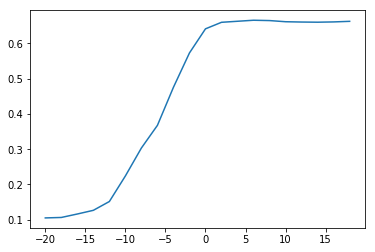

In [0]:
snr_error = {}
for i in range(0,len(y_test)):
  if(y_test[i] != y_pred[i] ):
    if snr_test[i] in snr_error:
      snr_error[snr_test[i]]+=1;
    else:
      snr_error[snr_test[i]]=1;

for i in snr_error:
  snr_error[i] = 1-(snr_error[i] / snr_values[i])
import matplotlib.pylab as plt

lists = sorted(snr_error.items()) # sorted by key, return a list of tuples
print(lists)
keys, values = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(keys, values)
plt.show()

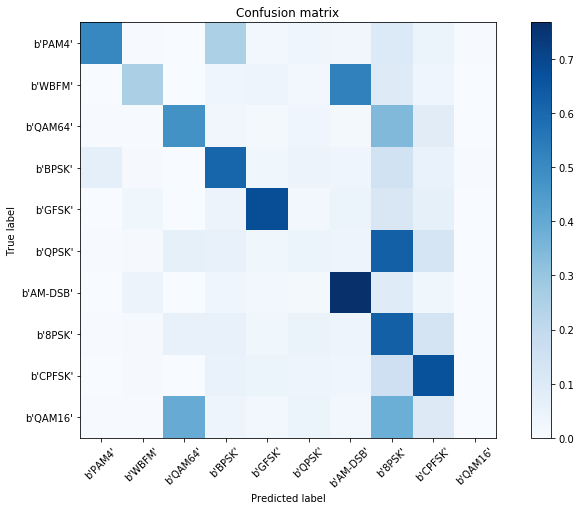

In [0]:
conf = np.zeros([10, 10])
confnorm = np.zeros([10, 10])
for i in range(0, X_test.shape[0]):
    j = y_test[i]
    k = y_pred[i]
    conf[j,k] = conf[j,k] + 1
for i in range(0, 10):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=list(keys))

## With differentiation

In [0]:
# Optimizer
from torch import optim

learning_rate = 0.001
model = FC_Network()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Defining the scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

# Loss function
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Moving the model to GPU if available
model.to(device)

FC_Network(
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.3)
)

In [0]:
from torchvision import datasets
import torch

batch_size = 1500
num_workers = 0

# divide data into batches 
# Train loader
train_loader = torch.utils.data.DataLoader(X_train, batch_size=batch_size, num_workers=num_workers)
train_labels = torch.utils.data.DataLoader(y_train, batch_size=batch_size, num_workers=num_workers)

# Validation loader
validation_loader = torch.utils.data.DataLoader(X_valid, batch_size=batch_size, num_workers=num_workers) 
validation_labels = torch.utils.data.DataLoader(y_valid, batch_size=batch_size, num_workers=num_workers)

# Test Loader 
test_loader = torch.utils.data.DataLoader(X_test, batch_size=batch_size, num_workers=num_workers)
test_labels = torch.utils.data.DataLoader(y_test, batch_size=batch_size, num_workers=num_workers)

In [0]:
train_valid(100, model, train_loader, train_labels, validation_loader, validation_labels)

In [0]:
model.load_state_dict(torch.load('modulation_classification.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [0]:
test_model(model, test_loader, test_labels)

Test Loss: 1.622487


Test Accuracy (Overall): 33% (198814/600000)


In [0]:
y_pred = prediction(model, test_loader)

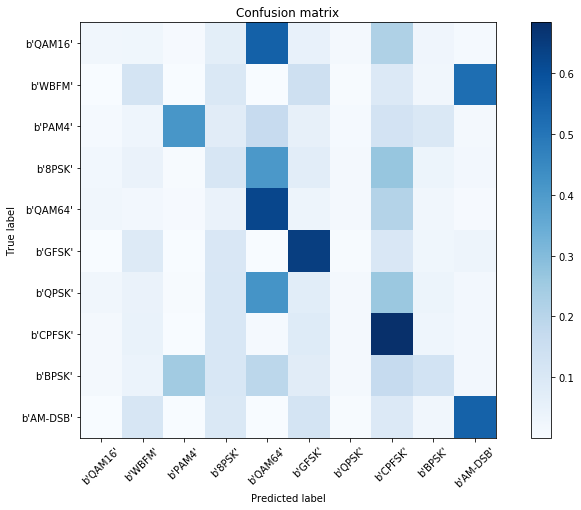

In [0]:
conf = np.zeros([10, 10])
confnorm = np.zeros([10, 10])
for i in range(0, X_test.shape[0]):
    j = y_test[i]
    k = y_pred[i]
    conf[j,k] = conf[j,k] + 1
for i in range(0, 10):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=list(keys))

## With Integral features

In [0]:
# Optimizer
from torch import optim

learning_rate = 0.001
model = FC_Network()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Defining the scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

# Loss function
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Moving the model to GPU if available
model.to(device)

FC_Network(
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.3)
)

In [0]:
from torchvision import datasets
import torch

batch_size = 2048
num_workers = 0

# divide data into batches 
# Train loader
train_loader = torch.utils.data.DataLoader(X_train, batch_size=batch_size, num_workers=num_workers)
train_labels = torch.utils.data.DataLoader(y_train, batch_size=batch_size, num_workers=num_workers)

# Validation loader
validation_loader = torch.utils.data.DataLoader(X_valid, batch_size=batch_size, num_workers=num_workers) 
validation_labels = torch.utils.data.DataLoader(y_valid, batch_size=batch_size, num_workers=num_workers)

# Test Loader 
test_loader = torch.utils.data.DataLoader(X_test, batch_size=batch_size, num_workers=num_workers)
test_labels = torch.utils.data.DataLoader(y_test, batch_size=batch_size, num_workers=num_workers)

In [0]:
train_valid(100, model, train_loader, train_labels, validation_loader, validation_labels)

In [0]:
model.load_state_dict(torch.load('modulation_classification.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [0]:
test_model(model, test_loader, test_labels)

Test Loss: 1.222990


Test Accuracy (Overall): 48% (292561/600000)


In [0]:
y_pred = prediction(model, test_loader)

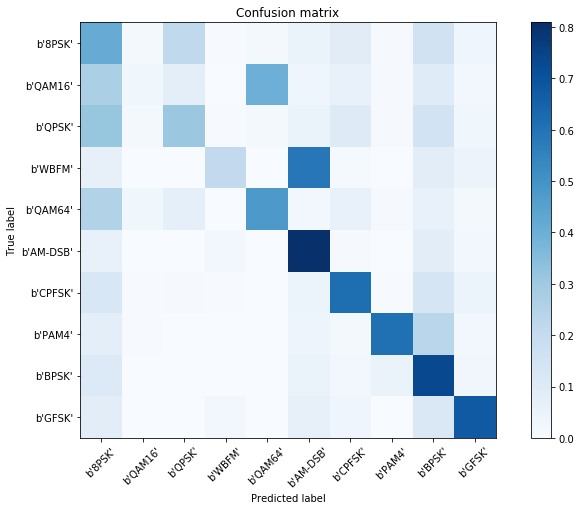

In [0]:
conf = np.zeros([10, 10])
confnorm = np.zeros([10, 10])
for i in range(0, X_test.shape[0]):
    j = y_test[i]
    k = y_pred[i]
    conf[j,k] = conf[j,k] + 1
for i in range(0, 10):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=list(keys))

## Integral features gets the best test accuracy compared to the raw features and first derivative features.

# Convolutional Neural Network

In [0]:
class CNN_Network(nn.Module):
  
  def __init__(self):
    
    super(CNN_Network, self).__init__()
     
    # Conv1 layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(1, 3), stride=1, padding=(0, 2))
    # Conv2 layer
    self.conv2 = nn.Conv2d(in_channels=128, out_channels=16, kernel_size=(2, 3), stride=1, padding=(0, 2))
    # Dense layer 1
    self.fc1 = nn.Linear(16 * 1 * 132, 128)
    # Dense layer 2
    self.fc2 = nn.Linear(128, 10)
    # Drop out
    self.dropout = nn.Dropout(p=0.23)
    
  def forward(self, x):
    # Layer 1
    x = F.relu(self.conv1(x))
    # Layer 2
    x = F.relu(self.conv2(x))
#     print(x.shape)
    # Dense layer 1
    x = x.view(-1, 16 * 1 * 132)
    x = self.dropout(x)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    # Dense layer 2
    x = self.fc2(x)
    # returning output
    return x  

### Raw Features

In [0]:
# Optimizer
from torch import optim

learning_rate = 0.0001

model = CNN_Network()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Defining the scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

# Loss function
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Moving the model to GPU if available
model.to(device)

CNN_Network(
  (conv1): Conv2d(1, 128, kernel_size=(1, 3), stride=(1, 1), padding=(0, 2))
  (conv2): Conv2d(128, 16, kernel_size=(2, 3), stride=(1, 1), padding=(0, 2))
  (fc1): Linear(in_features=2112, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.23)
)

In [0]:
from torchvision import datasets
import torch

batch_size = 512
num_workers = 0

# divide data into batches 
# Train loader
train_loader = torch.utils.data.DataLoader(X_train, batch_size=batch_size, num_workers=num_workers)
train_labels = torch.utils.data.DataLoader(y_train, batch_size=batch_size, num_workers=num_workers)

# Validation loader
validation_loader = torch.utils.data.DataLoader(X_valid, batch_size=batch_size, num_workers=num_workers) 
validation_labels = torch.utils.data.DataLoader(y_valid, batch_size=batch_size, num_workers=num_workers)

# Test Loader 
test_loader = torch.utils.data.DataLoader(X_test, batch_size=batch_size, num_workers=num_workers)
test_labels = torch.utils.data.DataLoader(y_test, batch_size=batch_size, num_workers=num_workers)

In [0]:
train_valid(110, model, train_loader, train_labels, validation_loader, validation_labels, scheduler, criterion, device, optimizer)

In [0]:
model.load_state_dict(torch.load('modulation_classification.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [0]:
test_model(model, test_loader, test_labels, criterion, device)

Test Loss: 1.134167


Test Accuracy (Overall): 52% (316360/600000)


In [0]:
y_pred = prediction(model, test_loader)

[(-20, 0.10556182385345458), (-18, 0.10640931290559974), (-16, 0.11764116271299696), (-14, 0.13024592354985298), (-12, 0.17158320248555103), (-10, 0.28506651552028806), (-8, 0.3920726837060703), (-6, 0.4871820582238712), (-4, 0.579392566937525), (-2, 0.659889155982906), (0, 0.7168538579118762), (2, 0.7434027893909495), (4, 0.7484774867716064), (6, 0.756836165737371), (8, 0.7570530819628293), (10, 0.7587694554143298), (12, 0.7542392644168304), (14, 0.7543034957627118), (16, 0.7572564679037617), (18, 0.7592549630464323)]


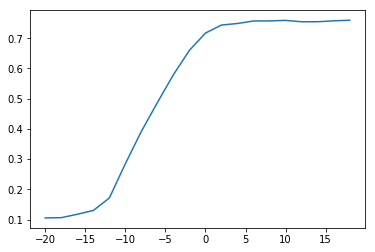

In [0]:
snr_error = {}
for i in range(0,len(y_test)):
  if(y_test[i] != y_pred[i] ):
    if snr_test[i] in snr_error:
      snr_error[snr_test[i]]+=1;
    else:
      snr_error[snr_test[i]]=1;

for i in snr_error:
  snr_error[i] = 1-(snr_error[i] / snr_values[i])
import matplotlib.pylab as plt

lists = sorted(snr_error.items()) # sorted by key, return a list of tuples
print(lists)
keys, values = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(keys, values)
plt.show()

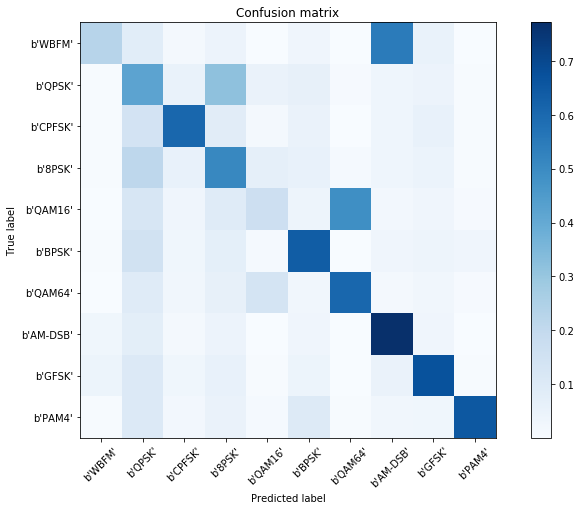

In [0]:
conf = np.zeros([10, 10])
confnorm = np.zeros([10, 10])
for i in range(0, X_test.shape[0]):
    j = y_test[i]
    k = y_pred[i]
    conf[j,k] = conf[j,k] + 1
for i in range(0, 10):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=list(keys))